In [ ]:
!pip install xgboost

In [68]:
# Model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

# Plot
import matplotlib.pyplot as plt

# Datas
from sklearn.model_selection import train_test_split
from google.colab import drive
import xgboost as xgb
import pandas as pd 
import numpy as np

from warnings import filterwarnings
filterwarnings('ignore')

# Prepare

In [48]:
# Data
drive.mount('/content/gdrive')
df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/learning-data-science-main/machine-learning/datas/Hitters.csv")
df = df.dropna()
df.index = np.arange(df.shape[0])

# Dummie
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1)
X = pd.concat([X, dms[["League_N", "Division_W", "NewLeague_N"]]], axis=1)

# Test Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

# Xgboost Special Datatype Transform
DM_train = xgb.DMatrix(data= X_train, label=y_train)
DM_test = xgb.DMatrix(data= X_test, label=y_test)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Model

In [ ]:
xgb_model = XGBRegressor().fit(X_train, y_train)

# Predict

In [53]:
y_pred = xgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

359.91750599447033

# Model Tuning

In [57]:
xgb_grid = {
     'colsample_bytree': [0.4, 0.5,0.6,0.9,1], 
     'n_estimators':[100, 200, 500, 1000],
     'max_depth': [2,3,4,5,6],
     'learning_rate': [0.1, 0.01, 0.5]}

xgb_model = XGBRegressor()
xgb_cv_model = GridSearchCV(xgb_model, 
                            param_grid = xgb_grid, 
                            cv=5, 
                            n_jobs = -1, 
                            verbose=2).fit(X_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[14:46:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [56]:
xgb_model
xgb_grid = {
     'colsample_bytree': [0.4,0.5,1], 
     'n_estimators':[500, 1000],
     'max_depth': [2,3,6],
     'learning_rate': [0.1, 0.5]
}
xgb = XGBRegressor()

xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_grid, 
                      cv = 3, 
                      n_jobs = -1,
                      verbose = 2)


xgb_cv.fit(X_train, y_train)
xgb_cv.best_params_
xgb_tuned = XGBRegressor(colsample_bytree = 0.9, 
                         learning_rate = 0.01, 
                         max_depth = 5, 
                         n_estimators = 1000) 

xgb_tuned = xgb_tuned.fit(X_train,y_train)
y_pred = xgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[14:42:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:42:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


366.8356029309698

### Tuned Model

In [70]:
# Params
params=pd.Series(xgb_cv_model.best_params_)
xgb_tuned = XGBRegressor(colsample_bytree=float(params[0]), 
                         n_estimators=int(params[3]), 
                         max_depth=int(params[2]), 
                         learning_rate=float(params[1]))
xgb_tuned.fit(X_train, y_train)

# Validated Error
y_pred = xgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

[14:51:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


343.5566804929871

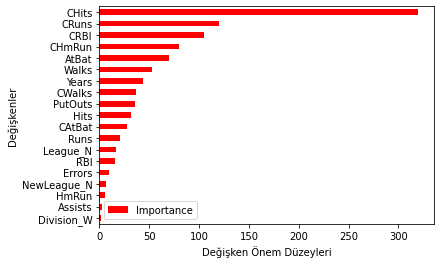

In [67]:
Importance = pd.DataFrame({"Importance": xgb_tuned.feature_importances_*1000},
                         index = X_train.columns)
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri");
plt.ylabel("Değişkenler");